I have chosen the Wine recognition dataset available on https://archive.ics.uci.edu/dataset/109/wine. This dataset,from three different classes, comprises of 13 different chemical constituents (columns other than classes) found in each of the wine types.

My aim is to explore how these chemical characteristics vary across different types of wines and to determine if these properties can effectively differentiate wine classes.

In [75]:
df1=pd.read_csv("/content/Index") #checking the origin of data
df1

,Index of wine
0,02 Dec 1996 105 Index
1,30 Oct 1995 10782 wine.data
2,19 Sep 1992 2643 wine.names


In [76]:
df2=pd.read_csv("/content/wine.data")
df2

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


From this, we can conclude that the dataset has 177 rows and 14 columns. However, the name of the columns are still unknown. Hence, extracting column names from https://archive.ics.uci.edu/static/public/109/data.csv

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Loading the dataset after checking column names from Variable Tables available on https://archive.ics.uci.edu/static/public/109/data.csv
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
wine_df = pd.read_csv('/content/wine.data', names=column_names) #storing dataset in the data frame wine_df
wine_df.head() #getting an overview of the dataset

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Now that the data has been assigned to the datadrame, performing EDA on the dataframe.


In [78]:
# Step 2:  EDA
# Summary statistics
summary_statistics = wine_df.describe()
summary_statistics

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The summary statsistics indicates that all of the data is numerical because describe does not work on non numerical columns. Hence, now checking the datatypes of each column

In [79]:
data_types = wine_df.dtypes
print(data_types)

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280/OD315_of_diluted_wines    float64
Proline                           int64
dtype: object


The data type for each column is also numeric. Now checking for missing values (NaN) in the dataset

In [74]:
# Checking for missing values
missing_values = wine_df.isnull().sum()
missing_values

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

The output indicates that there is no missing value in the dataframe

However, there might be some erroneous entries like " < "   ,  " > "   ,  "  !  "  ,  " ?  "  ,    " ; "   ,  " : "   ,  " . "  ,  "  ,  " and etc. Hence, checking all the unique values.


In [39]:
for column in wine_df.columns:
  print("{}:{}".format(column,wine_df[column].unique()))

Class:[1 2 3]
Alcohol:[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Malic_acid:[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.0

From the dataset, it can be concluded that none of the values are erroneous. Hence, there is neither need to remove any row, column nor any need to fill them with the mean of the values in that column.

Therefore, proceeding with the visualizations

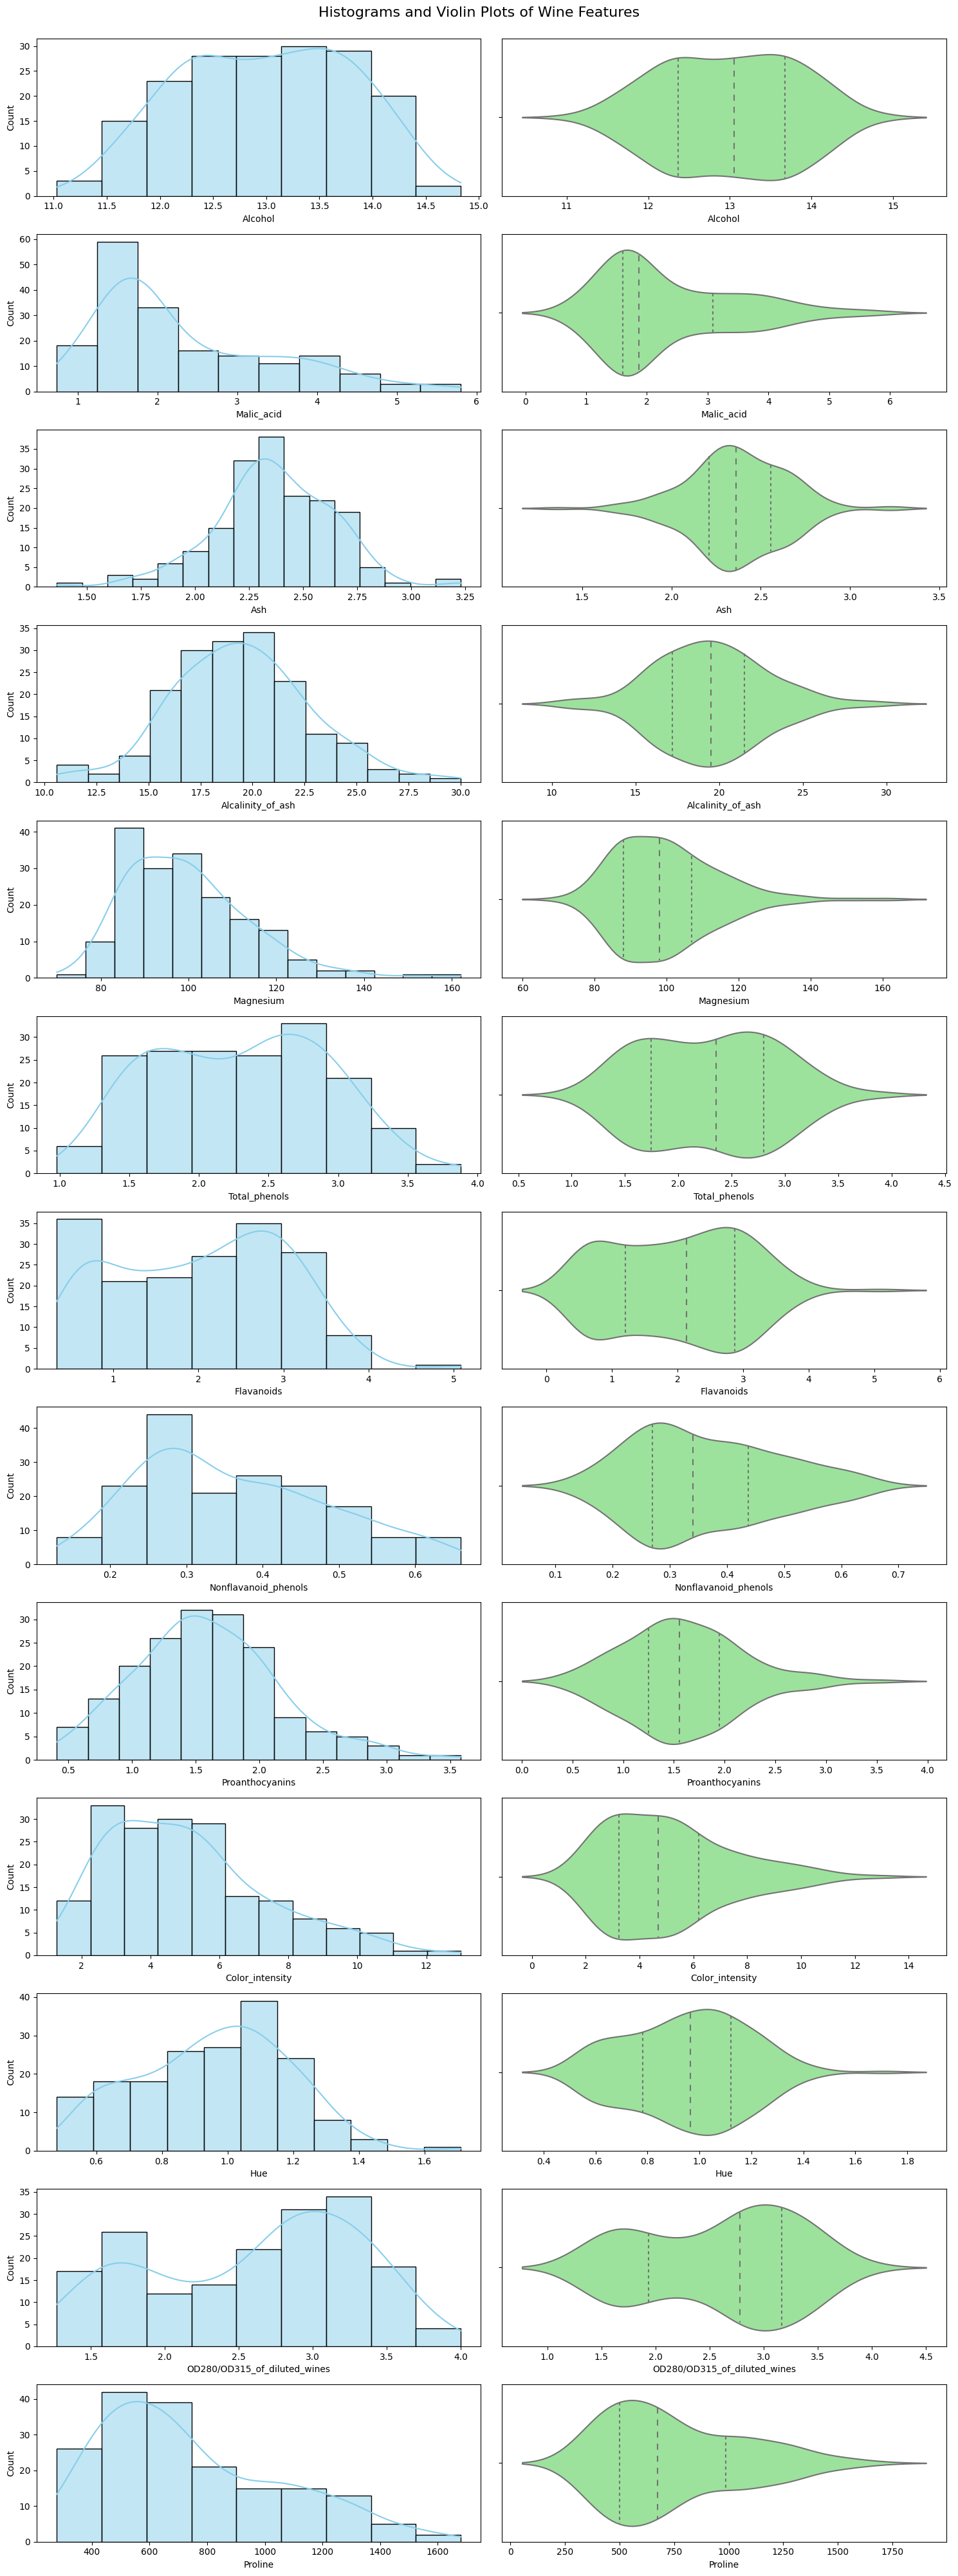

In [91]:
# Step 3: Visualizations - Histograms and Violin Plots

#Since there are 13 rows (excluding classes as that is categorical (variable table available on https://archive.ics.uci.edu/dataset/109/wine)) and 2 columns
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(15, 40))

fig.suptitle('Histograms and Violin Plots of Wine Features', fontsize=16, y=1) #y=1 maintains a distance between the title and the plot. It is 0 by default

axes = axes.flatten()
for i, col in enumerate(wine_df.columns[1:]): #index starts from 0. Since 1st column is classes, starting from 1 meaning from 2nd column to all the columns
    sns.histplot(wine_df[col], ax=axes[2*i], kde=True, color='skyblue')
    sns.violinplot(x=wine_df[col], ax=axes[2*i+1], inner='quartile', color='lightgreen')

plt.tight_layout() #makes sure that plots are within the layout
plt.show()

The provided histograms and violin plots show the distribution of various chemical constituents across the wine samples.

The descriptions based on the visualizations are:

•Alcohol: The majority of wine samples have an alcohol percentage around 13%.

•Malic Acid: Most wines have lower malic acid content around 1 to 2.

•Ash: Most wines have an ash content around 2.3.

•Alcalinity of Ash: Most wines have an alcalinity of ash between 17.5 and 20.

•Magnesium: Most wine samples have magnesium content around 90 to 100.

•Total Phenols: Most wines have higher Phenol.

•Flavanoids: Most wines have higher flavanoid content.

•Nonflavanoid Phenols: This feature has variability across samples.

•Proanthocyanins: Majority of wines have lower proanthocyanin levels.

•Hue: Most wines have a hue around 1.

•OD280/OD315 of Diluted Wines: Most wines are highly diluted

•Proline: Majority of the wines have lower concentration of proline content.



Since "Class" is a categorical variable, a simple histogram is not advisable. For this reason, "Class" can be counted via count plot.

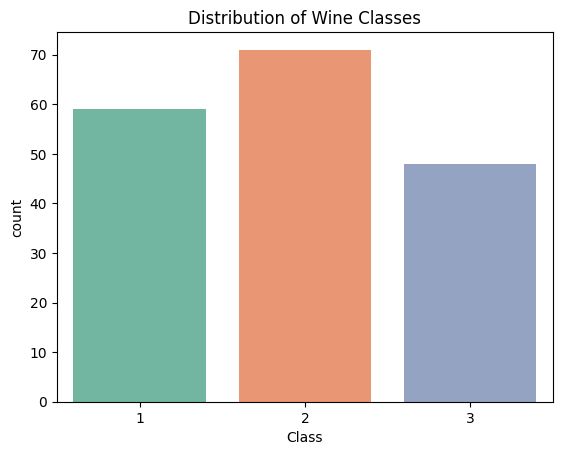

In [35]:
# Visualizing the distribution of the 'Class' variable
sns.countplot(x='Class', data=wine_df, palette='Set2')
plt.title('Distribution of Wine Classes')
plt.show()

Based on 177 counts, most of the wines are of class "2".

A boxplot has categorical variable on the x axis and other attributes on y axis. Hence, plotting a boxplot with different attributes on y axis.

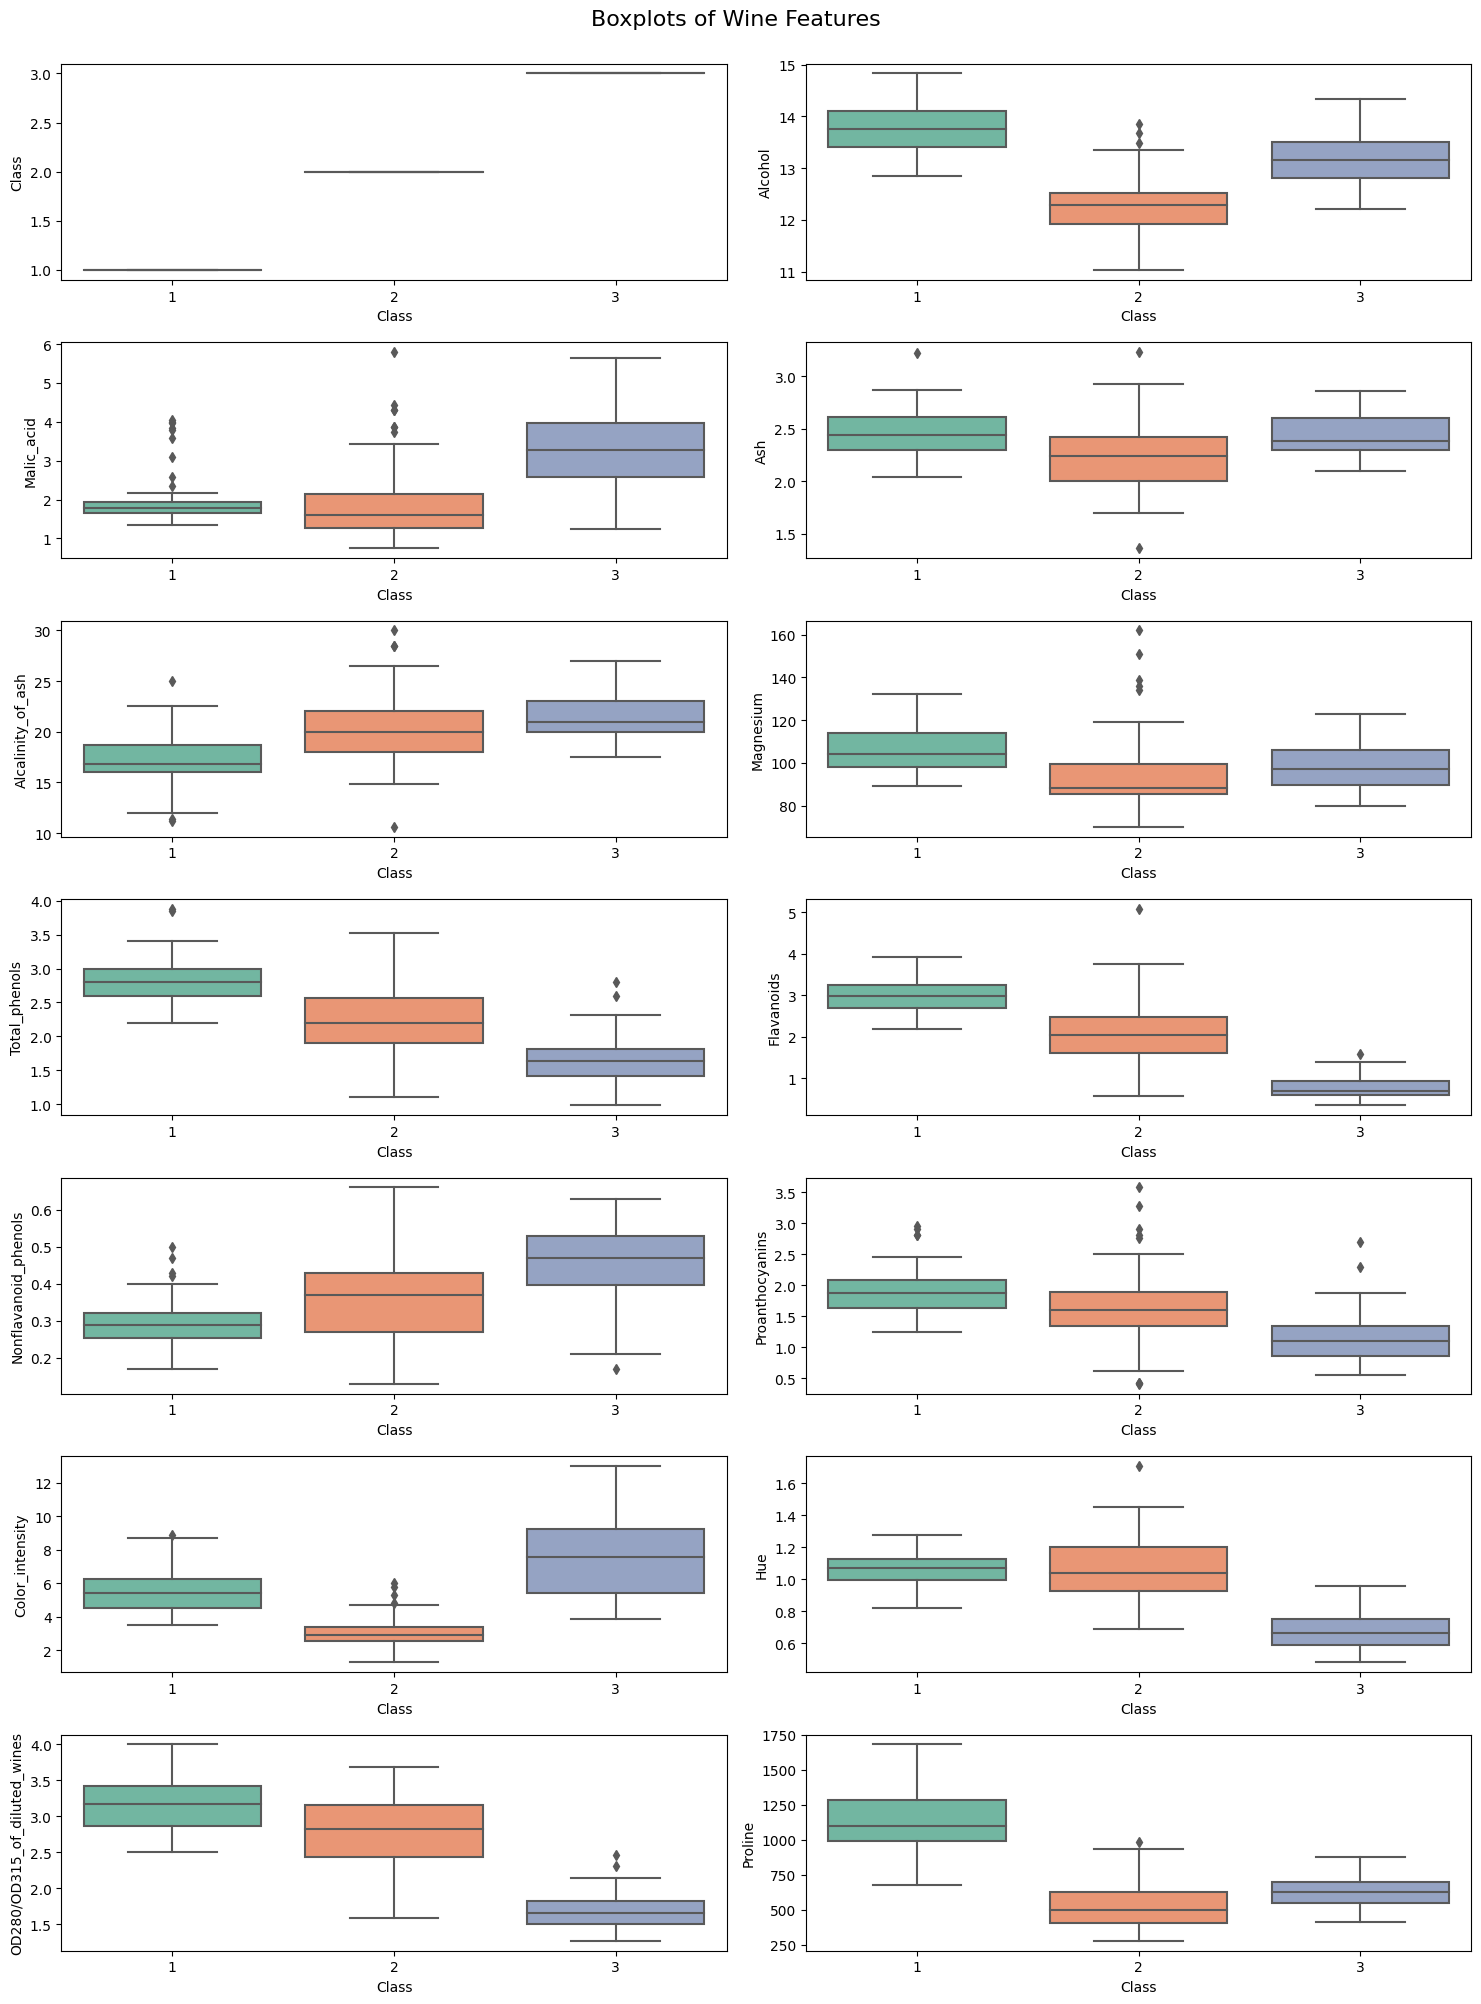

In [93]:
# Creating a matrix of boxplots for all variables, grouped by the 'Class' variable
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))  # Adjust for 13 features plus the 'Class' variable
fig.suptitle('Boxplots of Wine Features', fontsize=16, y=1)

# Flattening the axes array for easy indexing
axes = axes.flatten()

# Plotting boxplots for each feature including 'Class'
for i, col in enumerate(wine_df.columns):
    sns.boxplot(x='Class', y=col, data=wine_df, ax=axes[i], palette='Set2')

plt.tight_layout()
plt.show()


From the boxplot, the following can be concluded:

•Alcohol: Class 1 has a higher median alcohol level.

•Malic Acid: Class 3 tends to have higher malic acid content.

•Ash: Class 2 has slightly higher ash values.

•Alcalinity of Ash: Class 2 wines tend to have higher alcalinity of ash.

•Magnesium: Class 1 shows higher level of magnesium while class 3 has broader spread of magnesium levels.

•Total Phenols: Class 1 wines have higher total phenols.

•Flavanoids: Class 1 wines possess significantly higher levels of flavanoids, which are important for wine taste.

•Nonflavanoid Phenols: Class 1 tends to have slightly lower levels of phenol.

•Proanthocyanins: Proanthocyanins are abundant in Class 1 wines.

•Color Intensity: Class 3 has the highest color intensity than Class 1.

•Hue: Class 1 wines have a higher median hue.

•OD280/OD315 of Diluted Wines: Higher values for Class 1 wines suggest a higher quality associated with protein.

•Proline: Proline levels are notably higher in Class 1 wines.

Variables, like flavanoids, total phenols, and proline, show significant differences between classes and could be strong indicators of wine classification in a predictive model.

However, concluding that these variables can effect the classes significantly only via a boxplot is not conlusive. A correlation plot can show positive and negative correlation which can further provide more information regarding variables effecting wine classes.

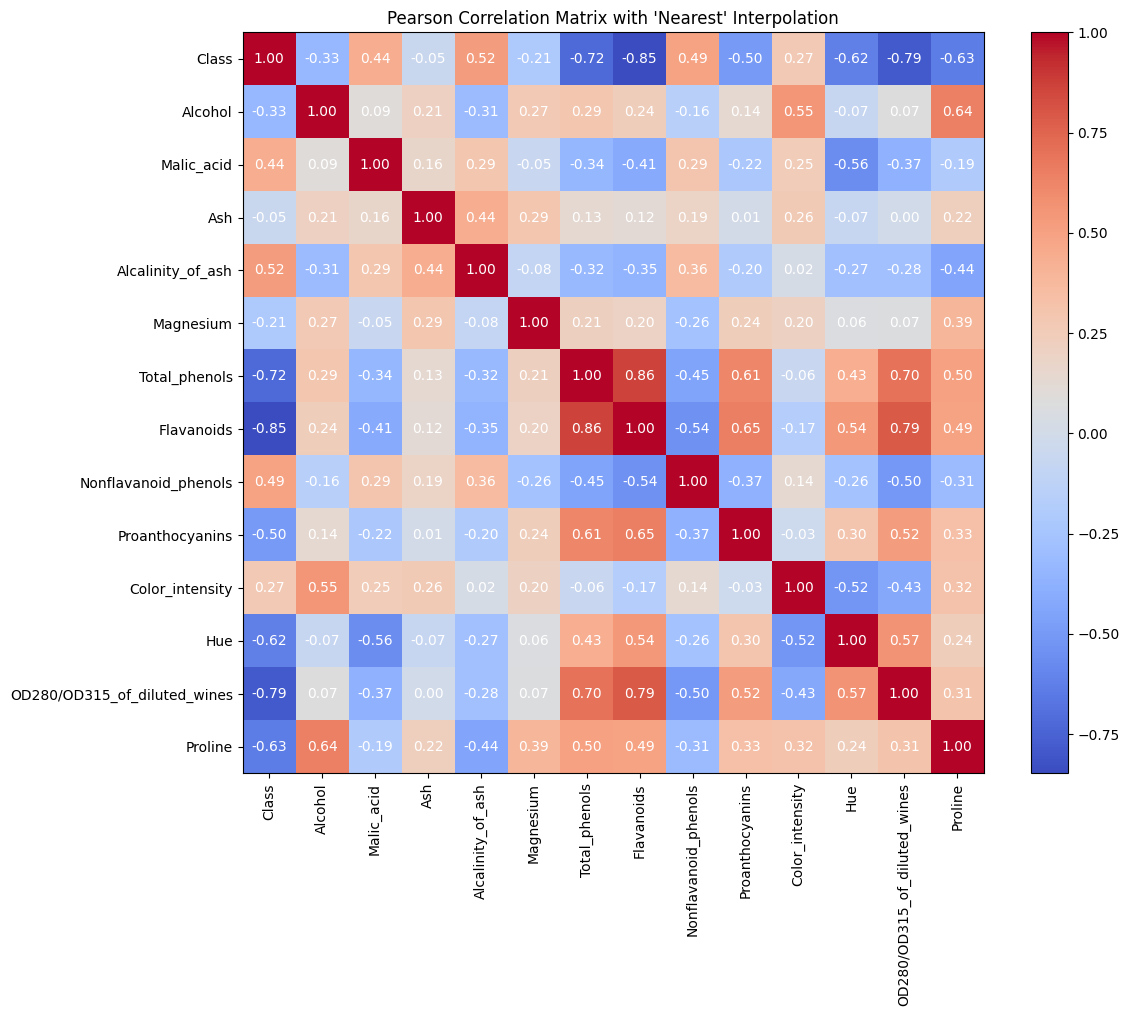

In [96]:
import numpy as np
# Computing the Pearson correlation matrix
pearson_corr = wine_df.corr(method='pearson')

# Displaying the correlation matrix as an image with 'nearest' interpolation
plt.figure(figsize=(12, 10))
plt.imshow(pearson_corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Adding the correlation values as text on top of the heatmap [annot=True displaying error]
for (j, i), value in np.ndenumerate(pearson_corr):
    plt.text(i, j, f'{value:.2f}', ha='center', va='center', color='white')

plt.xticks(ticks=np.arange(len(pearson_corr.columns)), labels=pearson_corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pearson_corr.index)), labels=pearson_corr.index)

plt.title("Pearson Correlation Matrix with 'Nearest' Interpolation")
plt.tight_layout()
plt.show()

Following can be concluded from the heatmap:

Color Gradient: The color gradient from blue to red indicates the range of correlation coefficients from -1 to 1, with blue representing negative correlation, red representing positive correlation, and white representing no correlation.

Correlation Values: The values inside the heatmap provide precise information about the relationship between each pair of variables.

Strong Correlations: The darker red and blue squares indicate stronger positive and negative correlations, respectively. For example, Total_phenols and Flavanoids have a strong positive correlation, as indicated by the dark red color. Similarly, proline effects the wine classes negatively by a significant number.

This visual representation helped to quickly identify which features are most correlated.

A scatterplot can be particularly useful for feature selection in predictive modelling. Hence, drawing a scatterplot.

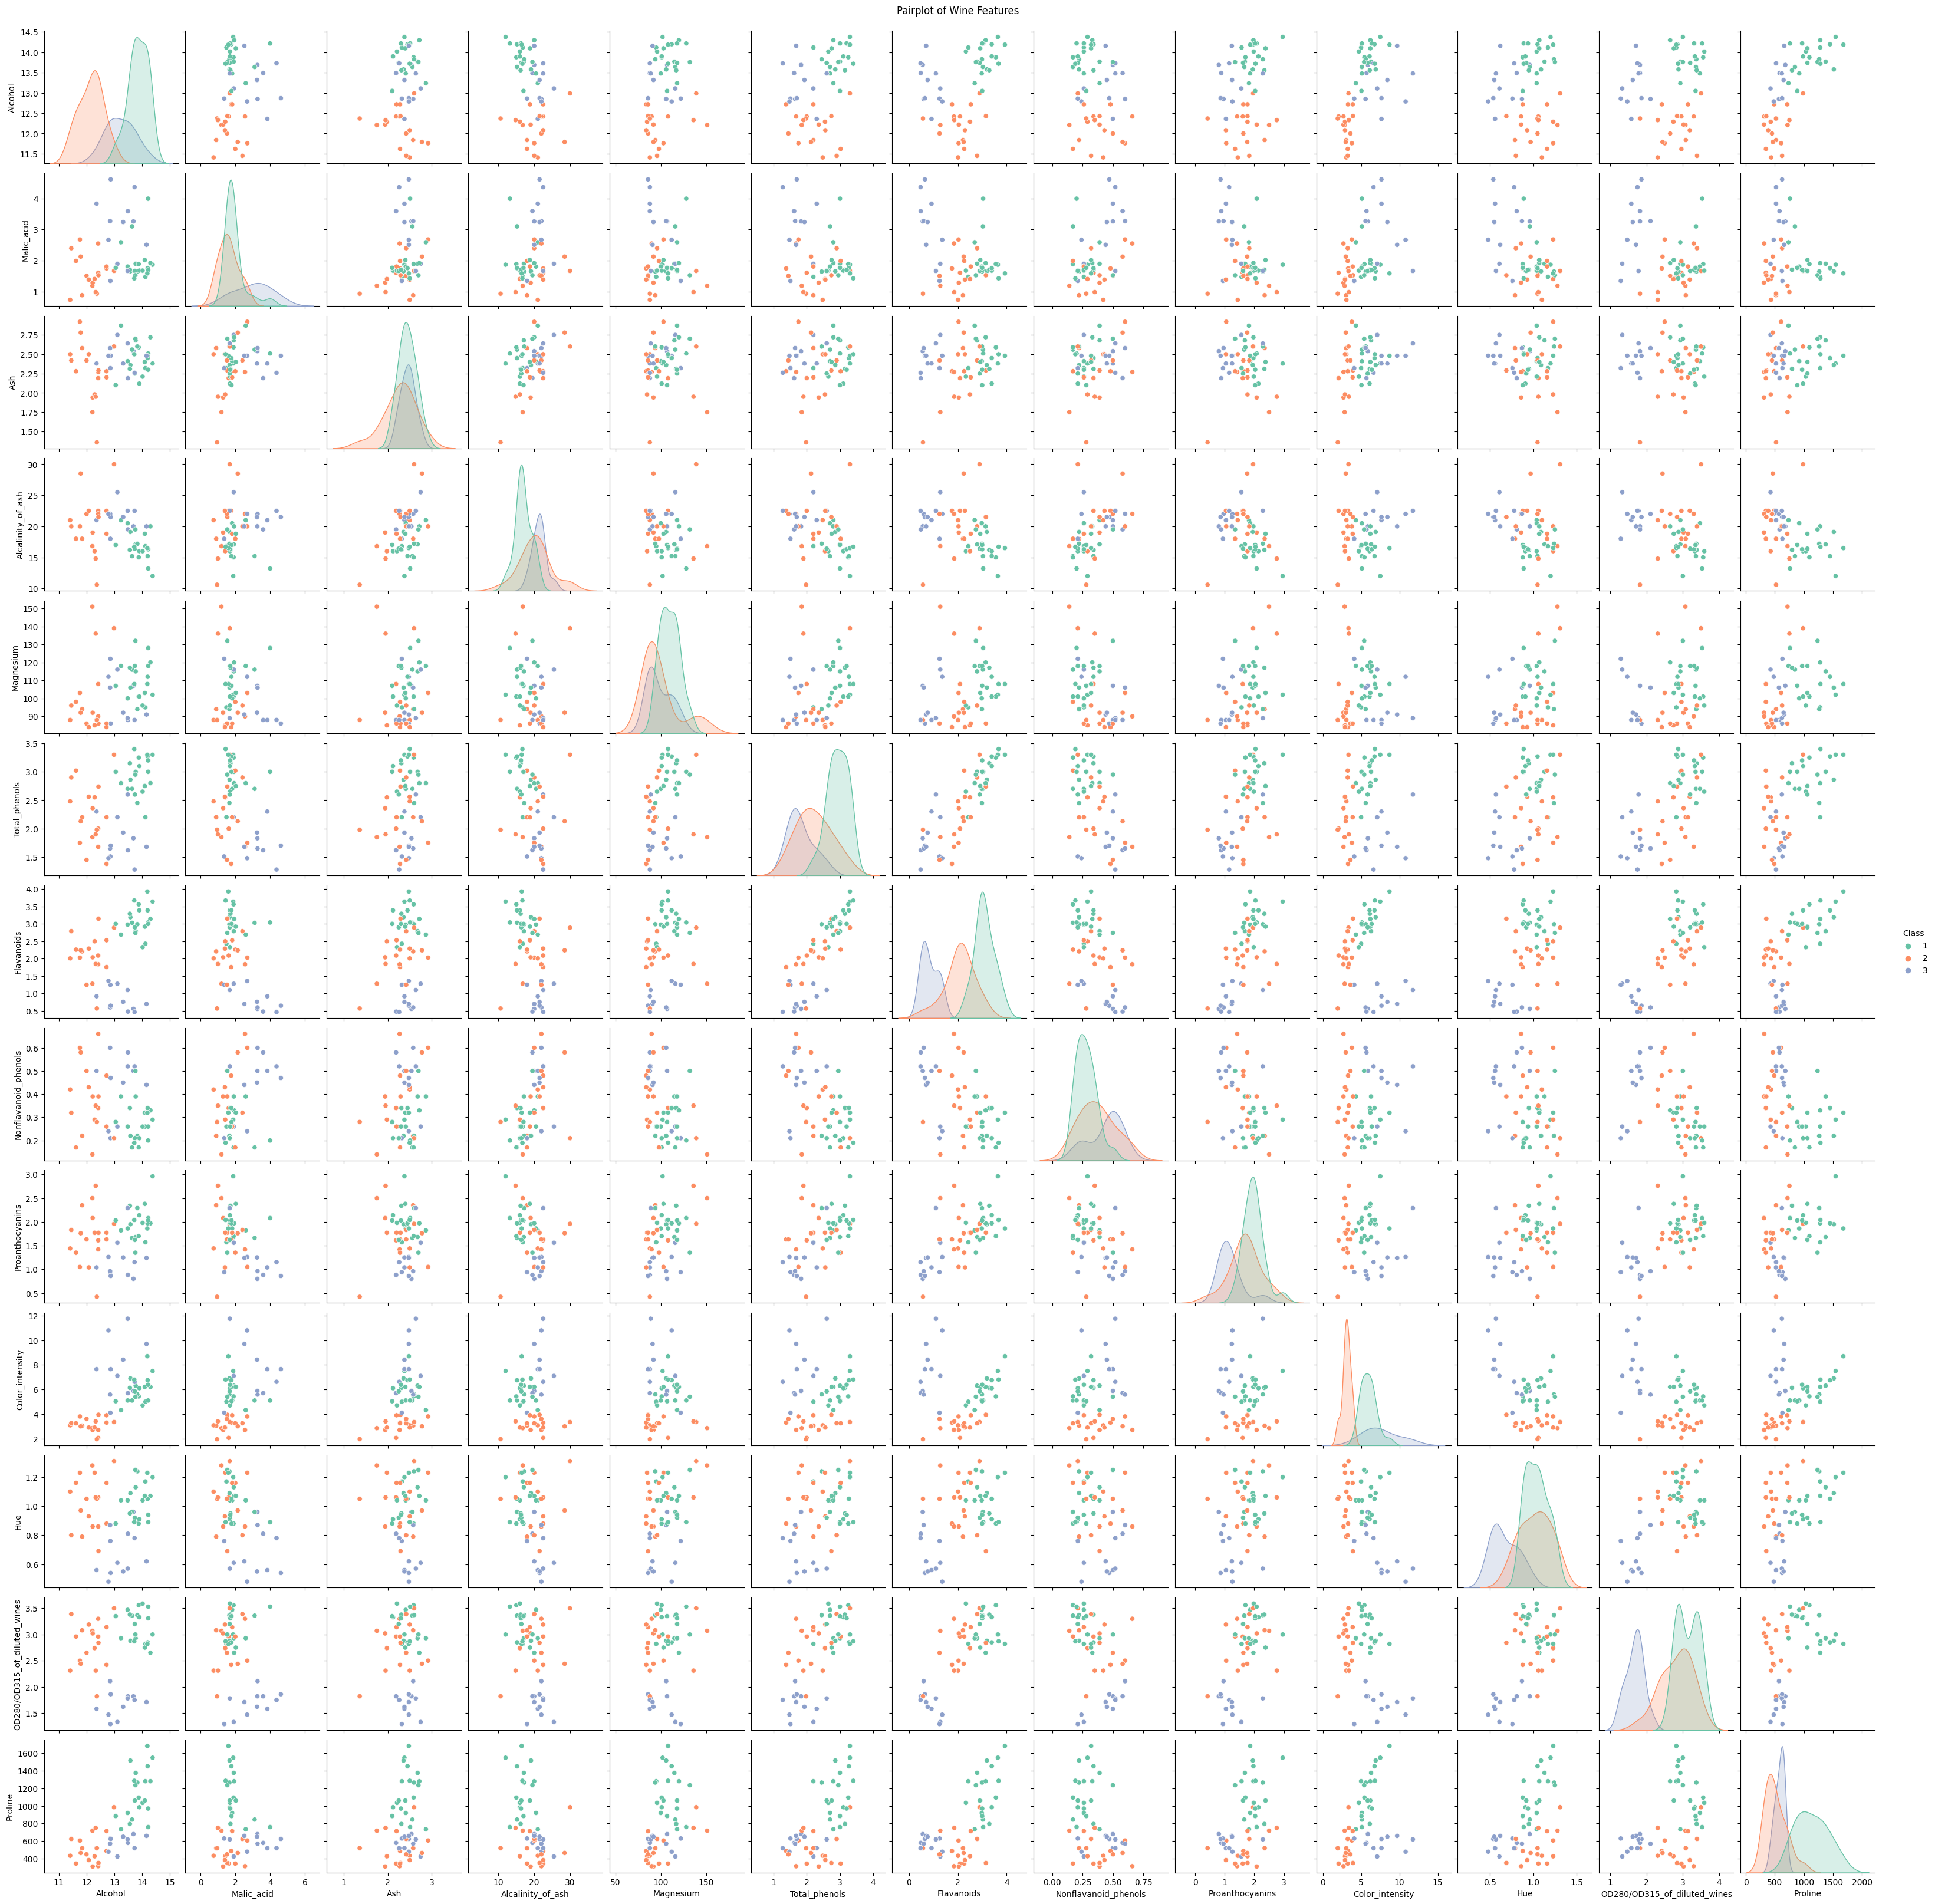

In [97]:
# Step 4: Plotting a scatterplot matrix
sampled_data = wine_df.sample(frac=0.3, random_state=1)
sns.pairplot(sampled_data, hue="Class", palette="Set2")
plt.suptitle("Pairplot of Wine Features", y=1)
plt.show()

The scatterplot confirms the correlation obtained from pearson correlation matrix.

Since now the boxplot, scatterplot and correlation matrxi are drawn, the target variable and variables that work best for target variable can also be identified.


Class is the variable that I aim to predict using the chemical properties (features) of the wines. Here's why Class is the target variable:

Categorical Nature: The Class variable is categorical, with discrete values representing different types of wine. This makes it suitable for a classification task.

Distinguishing Factor: From the boxplots and scatterplot matrix, it was observed that the Class variable shows distinct patterns when plotted against the chemical properties, suggesting that these properties can be used to differentiate between the classes.

TO consider variables that effect "Class" significantly, several factors are analyzed:

Correlation Strength:
Variables with a strong correlation to the target variable are likely to be good predictors. The correlation heatmap showed that Flavanoids, Total_phenols, and Proline have strong correlations with Class.

Distinct Distributions Across Classes:
Boxplots that showed clear separation between the classes suggest that those variables can effectively distinguish between different classes. Proline exhibited such characteristics.

Cluster Patterns in Scatterplots:

Variables that form distinct clusters when plotted against the Class in the scatterplot matrix suggest that they contribute significantly to class differentiation. Based on these considerations, the variables that are likely to be the most effective predictors for the target variable 'Class' are:

Flavanoids: Given their strong correlation with Class and the distinct clustering patterns observed in scatterplots, flavanoids are a powerful single predictor.

Total Phenols: Phenols have a strong correlation with Class and are related to flavanoids, further supporting their predictive power.

Proline: Proline showed a strong negative correlation with Class and varied significantly across classes in the boxplots.

The following can now be hypothesis from the data:

Certain chemical properties, such as flavanoids and total phenols, are highly correlated and can significantly differentiate between wine types.
